<a href="https://colab.research.google.com/github/Manikandans1610/SDC/blob/main/2April.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Cluster Labels: [1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 0 5 0 3 3 5 0 0 3 0 5 0 5 0 0 0 0 0 0 0 0 3 5
 0 5 0 0 0 0 5 3 0 0 3 3 0 0 0 0 0 0 0 0 5 0 0 0 3 3 4 4 4 4 4 4 4 4 4 4 4
 4 3 4 4 3 4 3 4 4 4 4 4 4 4 4 4 4 4 3 4 4 3 4 4 4 4 4 4 3 4 3 4 3 4 4 4 4
 4 4 2 5 2 5 2 2 5 2 2 2 5 5 5 2 2 5 5 2 2 2 2 5 2 2 2 5 2 5 5 2 2 2 2 2 5
 5 2 2 5 2 2 5 5 5 2 2 5 5 2 2]


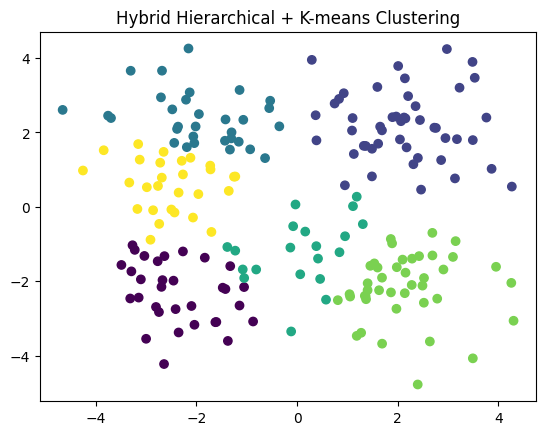

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

def hybrid_kmeans_hierarchical(data, n_clusters_hierarchical, n_clusters_kmeans):
    """
    Performs a hybrid clustering approach using hierarchical clustering followed by k-means.

    Args:
        data (numpy.ndarray): The input data, shape (n_samples, n_features).
        n_clusters_hierarchical (int): The number of clusters for hierarchical clustering.
        n_clusters_kmeans (int): The number of clusters for k-means clustering.

    Returns:
        numpy.ndarray: The cluster labels assigned by k-means.
    """

    # 1. Hierarchical Clustering (Agglomerative Clustering)
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters_hierarchical)
    hierarchical_labels = hierarchical_clustering.fit_predict(data)

    # 2. Prepare data for k-means
    #   - Calculate cluster centers from hierarchical clustering.
    #   - Use the original data with the hierarchical cluster labels.

    cluster_centers = []
    for i in range(n_clusters_hierarchical):
        cluster_data = data[hierarchical_labels == i]
        if len(cluster_data) > 0:
            cluster_center = np.mean(cluster_data, axis=0)
            cluster_centers.append(cluster_center)
        else:
            # Handle empty cluster if needed; for example, assign a random centroid.
            # In practical application, handle empty clusters based on the data and use case.
            #For this example, use mean of whole dataset.
            cluster_centers.append(np.mean(data, axis = 0))

    cluster_centers = np.array(cluster_centers)

    # 3. K-means Clustering
    kmeans = KMeans(n_clusters=n_clusters_kmeans, n_init = 10) # n_init default will change to 10 in future sklearn releases.
    kmeans_labels = kmeans.fit_predict(data)

    return kmeans_labels

# Example Usage:
if __name__ == "__main__":
    # Generate sample data
    np.random.seed(0)
    data = np.concatenate([np.random.randn(50, 2) + [2, 2],
                           np.random.randn(50, 2) + [-2, -2],
                           np.random.randn(50, 2) + [2, -2],
                           np.random.randn(50, 2) + [-2, 2]])

    # Apply hybrid clustering
    n_clusters_hierarchical = 4  # Initial clustering with hierarchical
    n_clusters_kmeans = 6       # Final clustering with k-means
    final_labels = hybrid_kmeans_hierarchical(data, n_clusters_hierarchical, n_clusters_kmeans)

    print("Final Cluster Labels:", final_labels)

    #Optional plotting to visualize the results.
    import matplotlib.pyplot as plt

    plt.scatter(data[:, 0], data[:, 1], c=final_labels, cmap='viridis')
    plt.title("Hybrid Hierarchical + K-means Clustering")
    plt.show()

Cluster Labels: [2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 3 1 3 0 0 1 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 0 3
 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Cluster Centers:
 [[ 1.7264033  -1.9273313 ]
 [-2.2031763   1.67746548]
 [ 2.08918924  2.13474315]
 [-2.19972131 -2.04426625]]


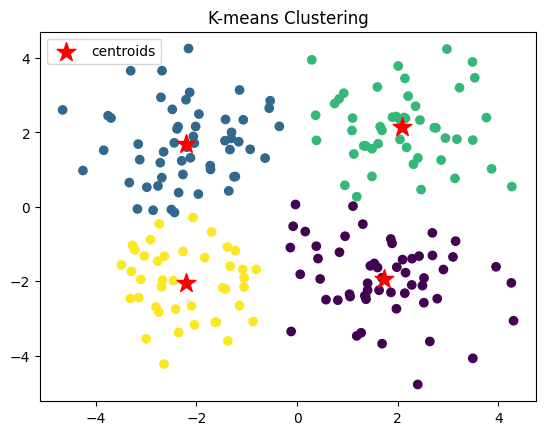

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

def kmeans_clustering(data, n_clusters):
    """
    Performs k-means clustering on the given data.

    Args:
        data (numpy.ndarray): The input data, shape (n_samples, n_features).
        n_clusters (int): The number of clusters to form.

    Returns:
        numpy.ndarray: The cluster labels assigned by k-means.
        numpy.ndarray: The cluster centers.
    """

    kmeans = KMeans(n_clusters=n_clusters, n_init=10) # n_init default will change to 10 in future sklearn releases.
    kmeans.fit(data)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    return labels, centers

# Example Usage:
if __name__ == "__main__":
    # Generate sample data
    np.random.seed(0)
    data = np.concatenate([np.random.randn(50, 2) + [2, 2],
                           np.random.randn(50, 2) + [-2, -2],
                           np.random.randn(50, 2) + [2, -2],
                           np.random.randn(50, 2) + [-2, 2]])

    # Apply k-means clustering
    n_clusters = 4
    labels, centers = kmeans_clustering(data, n_clusters)

    print("Cluster Labels:", labels)
    print("Cluster Centers:\n", centers)

    # Optional plotting to visualize the results.
    import matplotlib.pyplot as plt

    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='red', label='centroids') #plot centroids
    plt.title("K-means Clustering")
    plt.legend()
    plt.show()

